# Dependencies

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# import API key
from config import API_Key

#Import citipy to collect latitude and longitudes of cities
from citipy import citipy

# Output File (CSV)
Output_Data_file = "../Output_Data/cities.csv"

# Create Randomized Cities List

In [2]:
# Set the ranges the latitude and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

#Create holding placements for the cordinates and the cities you're making
coordinates = []
cities = []

#Set ranges for coordinates you generate
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lat, lng)

In [3]:
#Connect the coordinates to the cities they match with
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
     
    #sub in 20% to replace any spaces in the URL so it runs correctly
    city = city.replace(" ", "20%")
    
    #Remove duplicates = if the city is not duplicated add it to the list
    if city not in cities:
        cities.append(city)
        
len(cities)

609

In [4]:
#Start the URL for the Weather Map API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + API_Key

In [5]:
#Create lists to add the API data into
city_name = []
country = []
date = []
lat = []
lng = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []

# Create a For Loop to Pull Data for Each City
### (API Calls)

In [9]:
#API call counter
api_call_count = 1

#Display counter
print("------------------------------------")
print("Grabbing your info now! Please hold.")
print("------------------------------------")

#Go through the cities in the list and get the API data to fill
for city in cities:
    try: 
        response = requests.get(f"{url}&q={city}").json()
        
        city_name.append(response["name"])
        
        cloudiness.append(response["clouds"]["all"])
        
        country.append(response["sys"]["country"])
        
        date.append(response["dt"])
        
        humidity.append(response["main"]["humidity"])
        
        max_temp.append(response["main"]["temp_max"])
        
        lat.append(response["coord"]["lat"])
        
        lng.append(response["coord"]["lon"])
        
        wind_speed.append(response["wind"]["speed"])
        
        city_record = response["name"]
        
        print(f"Record {api_call_count}: {city_record}")
   

        #Add one to counter to make it cycle through for loop
        api_call_count= api_call_count + 1
    
        #Insert pace to the API calls so we don't get kicked out/banned
        time.sleep(1.01)
    
    
    #If there is no city, skip the line and go to the next one
    except:
        print("No city found for that listing. Moving onto the next.")
    continue
    
    print("-----------------------------")
    print("Data Retrieval Complete")
    print("-----------------------------")
    
    

------------------------------------
Grabbing your info now! Please hold.
------------------------------------
Record 1 of 609 : Concordia
Record 2 of 609 : Bengkulu
Record 3 of 609 : Butaritari
Record 4 of 609 : Ilhabela
Record 5 of 609 : Cairns
No city found for that listing. Moving onto the next.
No city found for that listing. Moving onto the next.
Record 6 of 609 : Lebu
No city found for that listing. Moving onto the next.
Record 7 of 609 : Rikitea
Record 8 of 609 : Brae
Record 9 of 609 : Busselton
Record 10 of 609 : Chokurdakh
Record 11 of 609 : Esperance
No city found for that listing. Moving onto the next.
No city found for that listing. Moving onto the next.
Record 12 of 609 : Qaanaaq
No city found for that listing. Moving onto the next.
Record 13 of 609 : York
Record 14 of 609 : Ushuaia
Record 15 of 609 : Upernavik
Record 16 of 609 : Inuvik
Record 17 of 609 : Hobyo
Record 18 of 609 : Bosaso
No city found for that listing. Moving onto the next.
Record 19 of 609 : Sorong
Record

Record 172 of 609 : Daru
No city found for that listing. Moving onto the next.
No city found for that listing. Moving onto the next.
Record 173 of 609 : Āsosa
Record 174 of 609 : Garoowe
Record 175 of 609 : Beringovskiy
No city found for that listing. Moving onto the next.
Record 176 of 609 : Sālūr
Record 177 of 609 : Vardø
No city found for that listing. Moving onto the next.
Record 178 of 609 : Mayachnyy
Record 179 of 609 : Avesta
No city found for that listing. Moving onto the next.
Record 180 of 609 : Grădiştea
Record 181 of 609 : Talnakh
Record 182 of 609 : Qaqortoq
Record 183 of 609 : Isangel
Record 184 of 609 : Poum
Record 185 of 609 : Kruishoutem
Record 186 of 609 : Canby
Record 187 of 609 : Makkah al Mukarramah
No city found for that listing. Moving onto the next.
Record 188 of 609 : Chifeng
Record 189 of 609 : Anklam
No city found for that listing. Moving onto the next.
Record 190 of 609 : Iqaluit
Record 191 of 609 : Kalmunai
Record 192 of 609 : Dhali
Record 193 of 609 : Ancu

Record 357 of 609 : Biggar
No city found for that listing. Moving onto the next.
Record 358 of 609 : Zabul Province
Record 359 of 609 : Marawi
Record 360 of 609 : Pangkalanbuun
Record 361 of 609 : Tungor
Record 362 of 609 : Saint-François
Record 363 of 609 : Coari
No city found for that listing. Moving onto the next.
Record 364 of 609 : Sept-Îles
Record 365 of 609 : Salihorsk
No city found for that listing. Moving onto the next.
Record 366 of 609 : Angoche
Record 367 of 609 : Vestmanna
Record 368 of 609 : Camacupa
Record 369 of 609 : Djebeniana
Record 370 of 609 : Penzance
No city found for that listing. Moving onto the next.
Record 371 of 609 : Erzin
No city found for that listing. Moving onto the next.
Record 372 of 609 : Kabinda
Record 373 of 609 : Rāyagada
Record 374 of 609 : Andreapol'
Record 375 of 609 : Matara
Record 376 of 609 : Sirte
Record 377 of 609 : Amapá
Record 378 of 609 : Nadym
Record 379 of 609 : Blackfoot
No city found for that listing. Moving onto the next.
No city f

# Turn Data from API into a DF

In [ ]:
#Have to do this in order to populate scatter plots

In [31]:
weather_df = pd.DataFrame({"City": city_name,
                             "Cloudiness": cloudiness,
                             "Country": country,
                             "Humidity": humidity,
                             "Lat": lat,
                             "Lng": lng,
                             "Max Temp": max_temp,
                             "Wind Speed": wind_speed})

In [32]:
#Display Dict as DF
weather_dict.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Concordia,40,AR,NaT,48,-31.3930,-58.0209,84.20,4.61
1,Bengkulu,100,ID,NaT,81,-3.8004,102.2655,77.32,9.98
2,Butaritari,100,KI,NaT,80,3.0707,172.7902,81.81,14.88
3,Ilhabela,60,BR,NaT,81,-23.7781,-45.3581,75.06,5.68
4,Cairns,90,AU,NaT,88,-16.9167,145.7667,75.20,5.75


In [44]:
# Save city data into a csv file
#weather_dict.to_csv("Output_Data/cities.csv", index = False)

# Create Scatter Plots & Plot Data

In [ ]:
#We will be creating scatter plots to represent the following data
# -Temperature (F) vs. Latitude
# -Humidity (%) vs. Latitude
# -Cloudiness (%) vs. Latitude
# -Wind Speed (mph) vs. Latitude

### Temperature (F) vs. Latitude 

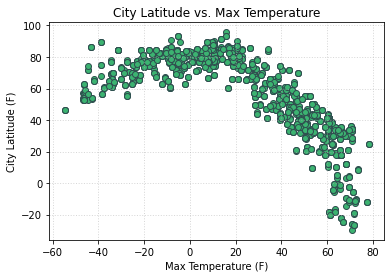

In [51]:
#Plot & Format Data
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "mediumseagreen", edgecolor = "darkslategrey")

#Set All Labels
#Title
plt.title("City Latitude vs. Max Temperature")
#X Axis
plt.xlabel("Max Temperature (F)")
#Y Axis
plt.ylabel("City Latitude (F)")

#Insert Gridlines
plt.grid(linestyle=":", linewidth=1, alpha=0.5)

#### Observations

-
-
-

### Humidity (%) vs. Latitude

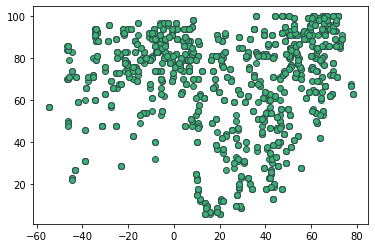

In [57]:
#Plot & Format Data
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "mediumseagreen", edgecolor = "darkslategrey")

### Cloudiness (%) vs. Latitude

### Wind Speed (mph) vs. Latitude